# Hyperlink Induced Topic Search (HITS) Algorithm

Hyperlink Induced Topic Search (HITS) Algorithm is a Link Analysis Algorithm that rates webpages, developed by Jon Kleinberg. This algorithm is used to the web link-structures to discover and rank the webpages relevant for a particular search. 
HITS uses hubs and authorities to define a recursive relationship between webpages. 

HITS uses hubs and authorities to define a recursive relationship between webpages.

<b>Authority:</b> A node is high-quality if many high-quality nodes link to it.

<b>Hub:</b> A node is high-quality if it links to many high-quality nodes


### Steps to implement HITS

* Initialize the hub and authority of each node with a value of 1
* For each iteration, update the hub and authority of every node in the graph
* The new authority is the sum of the hub of its parents
* The new hub is the sum of the authority of its children
* Normalize the new authority and hub

![image1](imagehits1.png)
![image2](imagehits2.png)
![image3](image3.png)
![image4](image4.png)

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

In [47]:
G = nx.DiGraph()

In [48]:
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")
G.add_node("F")
G.add_node("G")
G.add_node("H")

In [49]:
G.add_edges_from([("A","D"),("B","C"),("B","E"),("C","A"),("D","B"),("D","C"),("E","F"),("E","D"),("E","B"),("E","C"),("F","C"),("F","H"),("G","C"),("G","A"),("H","A")])

In [51]:
len(G.edges)

15

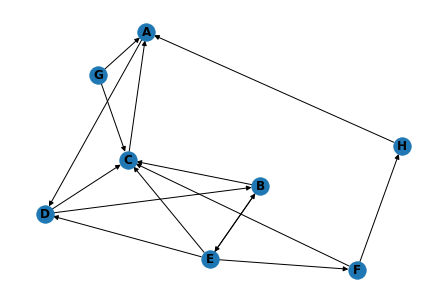

In [69]:
nx.draw(G, with_labels=True, font_weight='bold')

In [54]:
nx.hits(G ,max_iter = 50, normalized = True)

({'A': 0.04305010866633368,
  'B': 0.14444089275625216,
  'C': 0.029508489628427694,
  'D': 0.18749100142258587,
  'E': 0.26762580012702586,
  'F': 0.14444089275625216,
  'G': 0.15393432501469498,
  'H': 0.029508489628427694},
 {'A': 0.08751958758098452,
  'B': 0.18704574147053715,
  'C': 0.36903609552875044,
  'D': 0.1276828398619346,
  'E': 0.05936290160860254,
  'F': 0.10998993234058818,
  'G': 0.0,
  'H': 0.05936290160860254})

In [27]:
import numpy as np
import csv,random
import math
import matplotlib.pyplot as plt

In [37]:
class Node:
    def __init__(self,name,connected_to=None):
        self.name=name
        self.connected_to=connected_to
        self.incoming_edges=[]
        self.hub=1
        self.new_hub=0
        self.authority=1
        self.new_auth=0
        
    def __str__(self):
        return self.name

In [38]:
A=Node("A")
B=Node("B")
C=Node("C")
D=Node("D")
E=Node("E")
F=Node("F")
G=Node("G")
H=Node("H")
graph_nodes=[A,B,C,D,E,F,G,H]

In [39]:
A.connected_to=[D]
B.connected_to=[C,E]
C.connected_to=[A]
D.connected_to=[B,C]
E.connected_to=[F,D,B,C]
F.connected_to=[C,H]
G.connected_to=[C,A]
H.connected_to=[A]


In [40]:
for i in graph_nodes:
    for j in graph_nodes:
        if i in j.connected_to:
            i.incoming_edges.append(j)

In [33]:
B.incoming_edges

[<__main__.Node at 0x7f878bed4250>, <__main__.Node at 0x7f878bed4640>]

In [71]:
for i in range(2):
    print("-"*50,f"Iteration:{i}","-"*50)
    sum_auth=0
    sum_hub=0
    for node in (graph_nodes):
        if len(node.connected_to)==0:
            node.authority=0
            node.new_auth=0
        elif len(node.connected_to)==1:
            node.new_auth=node.connected_to[0].hub
        else:
            node.new_auth=0
          
            for conn in node.connected_to:
                node.new_auth+=conn.hub
        
        
        if len(node.incoming_edges)==0:
            node.hub=0
            node.new_hub=0
        elif len(node.incoming_edges)==1:
            node.new_hub=node.incoming_edges[0].authority
        else:
            node.new_hub=0
      
            for conn in node.incoming_edges:
                node.new_hub+=conn.authority
                

        sum_auth+=node.new_auth
        sum_hub+=node.new_hub
    
    
    for  node in graph_nodes:
        node.authority=node.new_auth/sum_auth
        print(f"{node.name} Hub=",node.authority)
        node.hub=node.new_hub/sum_hub
        print(f"{node.name} Authority=",node.hub)
        print("-"*50)
        
        
        
    
    
        
        

-------------------------------------------------- Iteration:0 --------------------------------------------------
A Hub= 0.044077134986225903
A Authority= 0.10881542699724517
--------------------------------------------------
B Hub= 0.14187327823691462
B Authority= 0.17906336088154268
--------------------------------------------------
C Hub= 0.03305785123966942
C Authority= 0.36776859504132225
--------------------------------------------------
D Hub= 0.18457300275482097
D Authority= 0.12121212121212122
--------------------------------------------------
E Hub= 0.26584022038567495
E Authority= 0.059228650137741035
--------------------------------------------------
F Hub= 0.14187327823691462
F Authority= 0.10468319559228649
--------------------------------------------------
G Hub= 0.1556473829201102
G Authority= 0.0
--------------------------------------------------
H Hub= 0.03305785123966942
H Authority= 0.059228650137741035
--------------------------------------------------
------------

In [228]:
A.hub

0.11428571428571428